In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sb
import matplotlib.pyplot as plt

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

/var/folders/bf/cmnv0y1n1h54pdg_phyk04wr0000gn/T/ipykernel_15380/1246072056.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=spam_distribution.index, y=spam_distribution.values, palette='viridis')


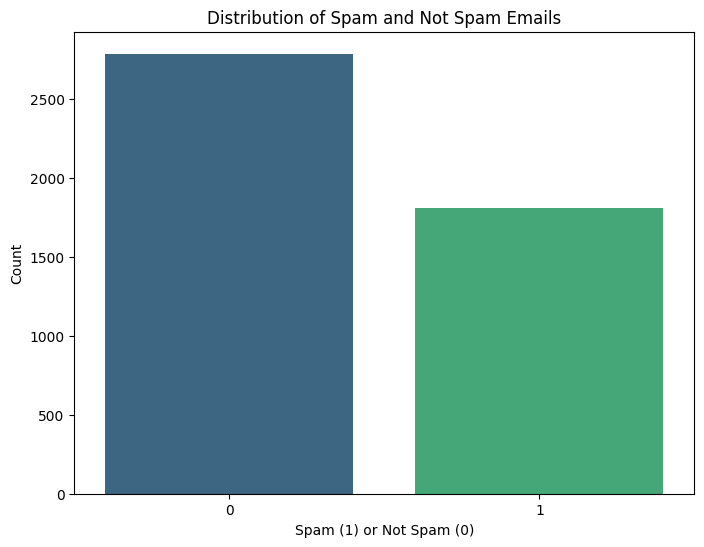

spam_notspam
0    2788
1    1813
Name: count, dtype: int64
spam_notspam                  1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capit

In [2]:
# Load the dataset
file_path = '/Users/kreshnayogi/Desktop/Programs/NTU Exercises/MiniProject/spambase.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Summary statistics for the dataset
summary_stats = df.describe()
print(summary_stats)

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Distribution of the target variable
spam_distribution = df['spam_notspam'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 6))
sb.barplot(x=spam_distribution.index, y=spam_distribution.values, palette='viridis')
plt.xlabel('Spam (1) or Not Spam (0)')
plt.ylabel('Count')
plt.title('Distribution of Spam and Not Spam Emails')
plt.show()

print(spam_distribution)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation of each feature with the target variable
correlation_with_target = correlation_matrix['spam_notspam'].sort_values(ascending=False)
print(correlation_with_target)

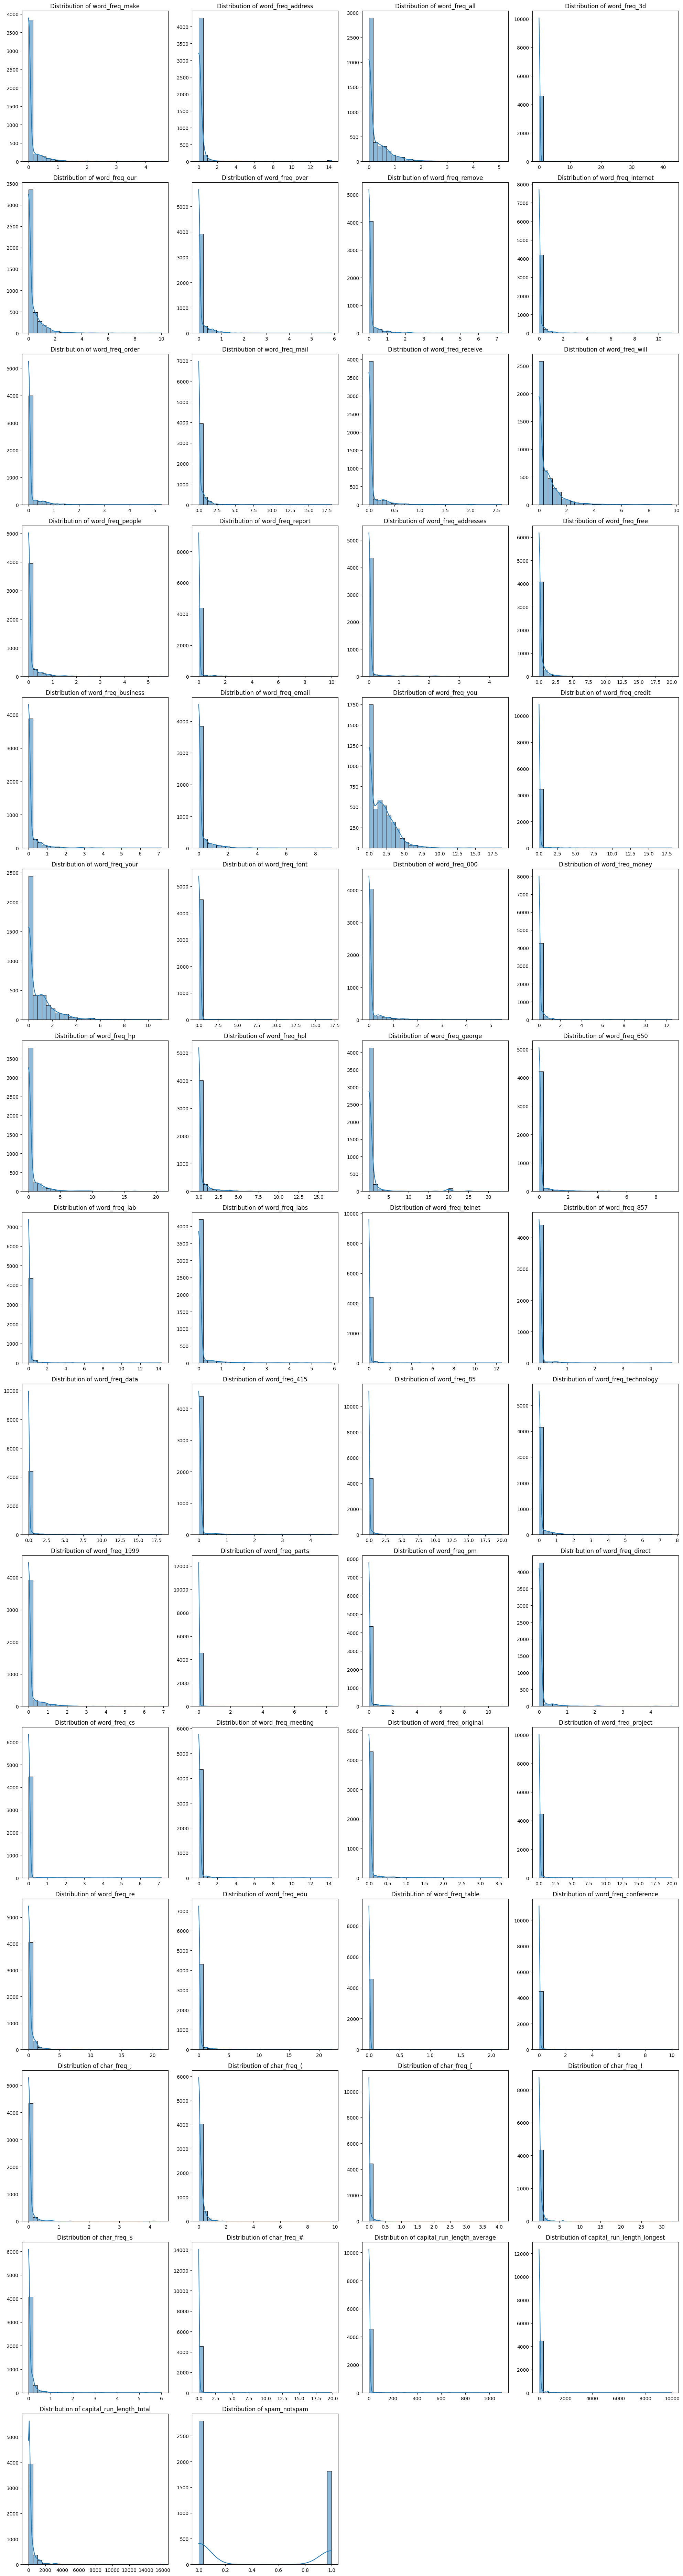

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Number of features
num_features = df.shape[1]

# Calculate the number of rows needed for the subplots
num_rows = int(np.ceil(num_features / 4))

# Set up the matplotlib figure
plt.figure(figsize=(20, num_rows * 5))

# Plot histograms for each feature
for i, feature in enumerate(df.columns):
    plt.subplot(num_rows, 4, i + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

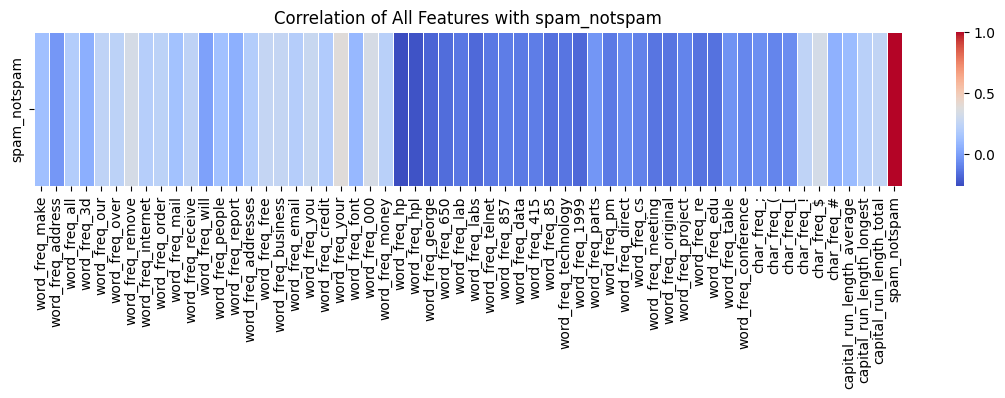

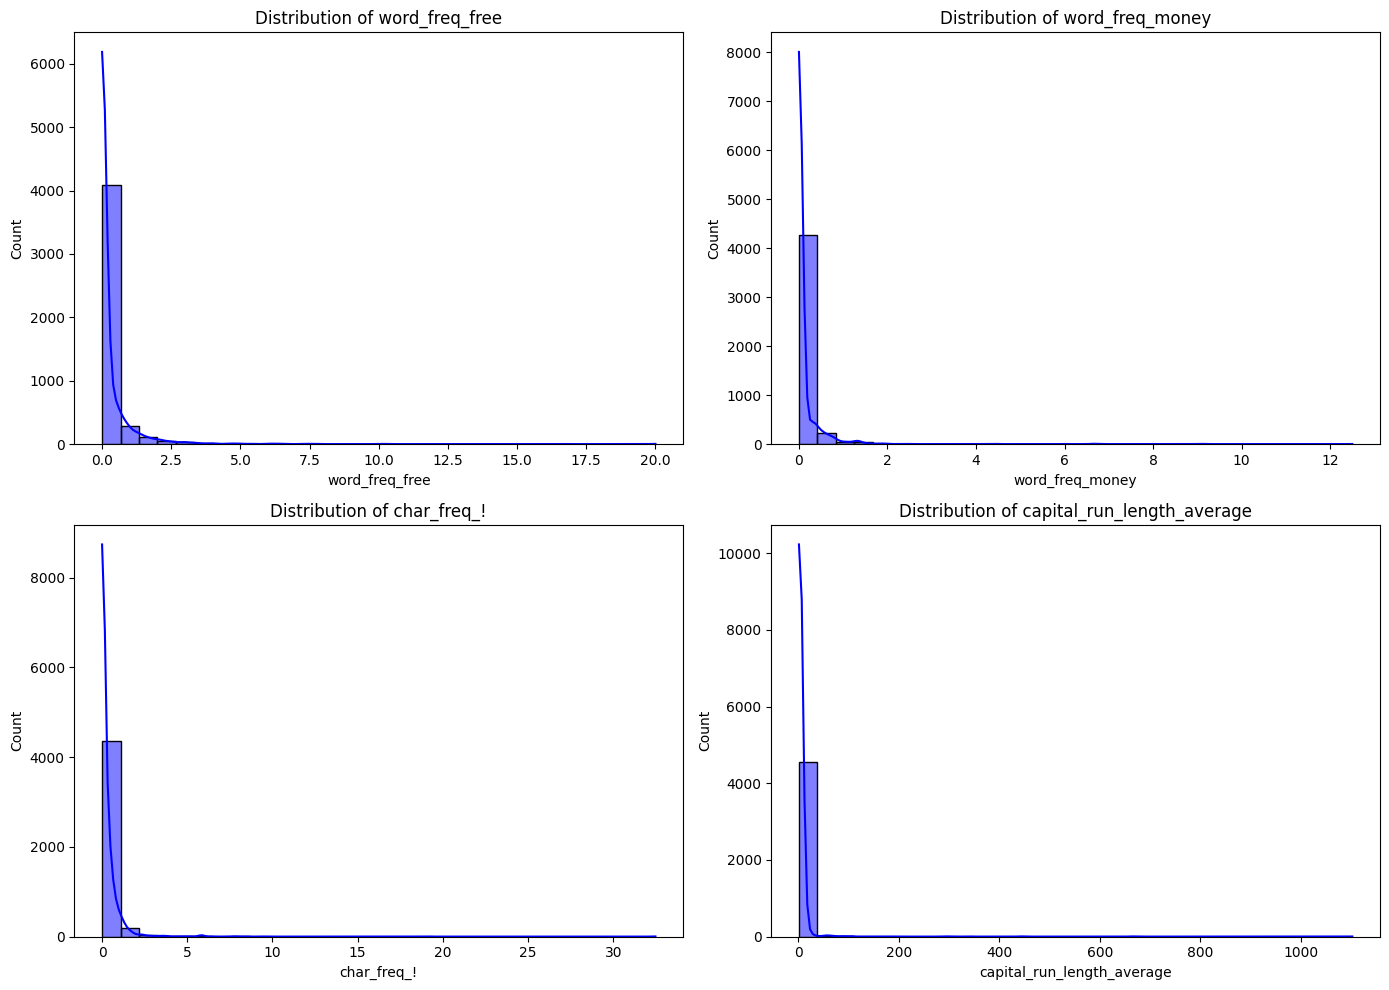

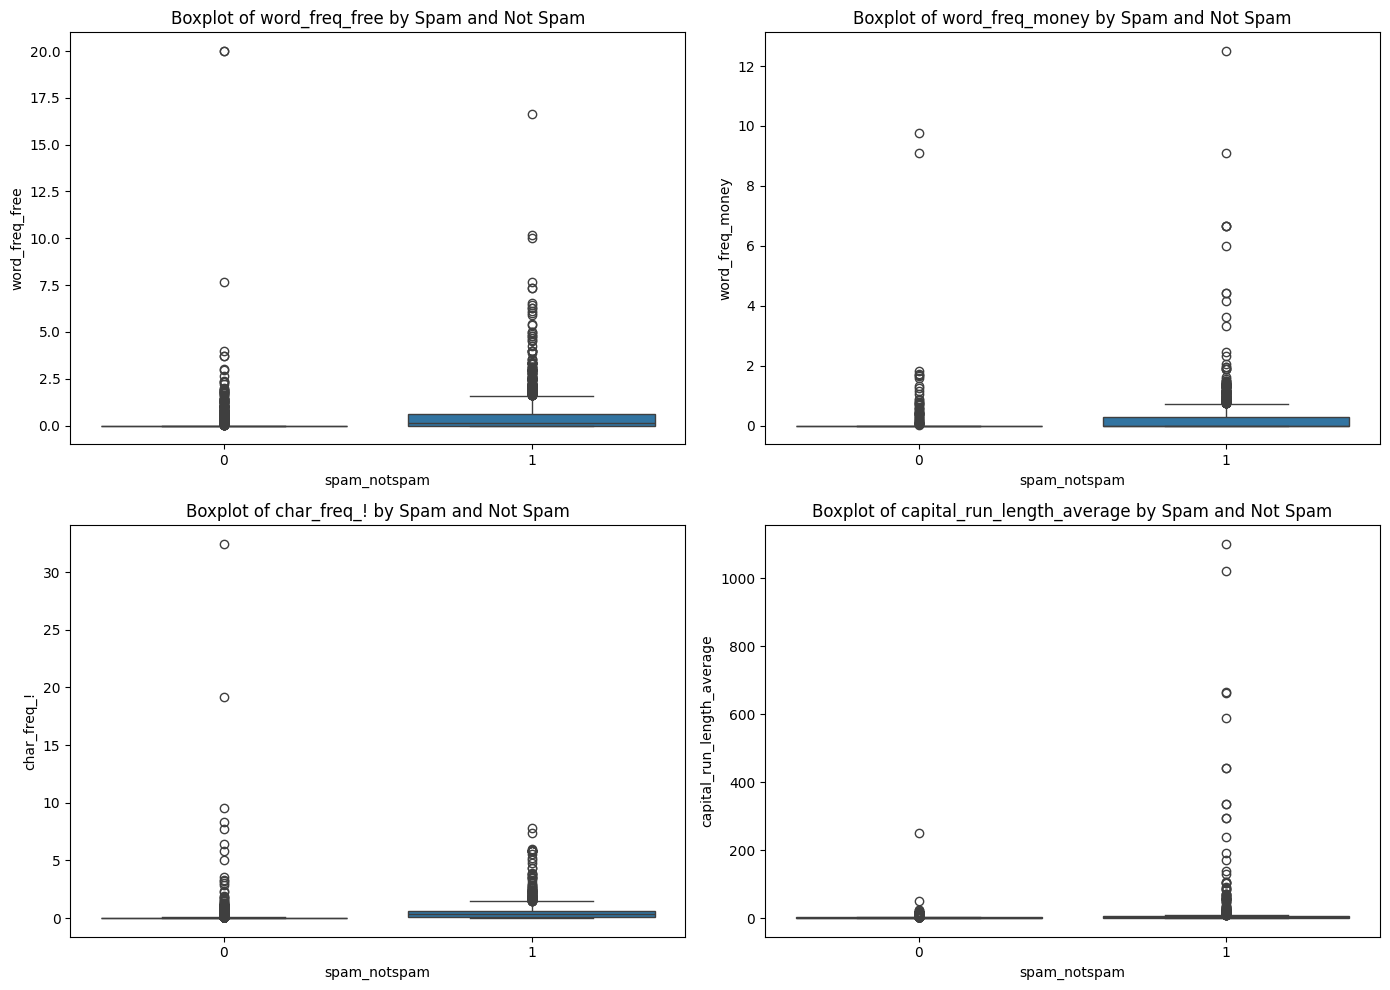

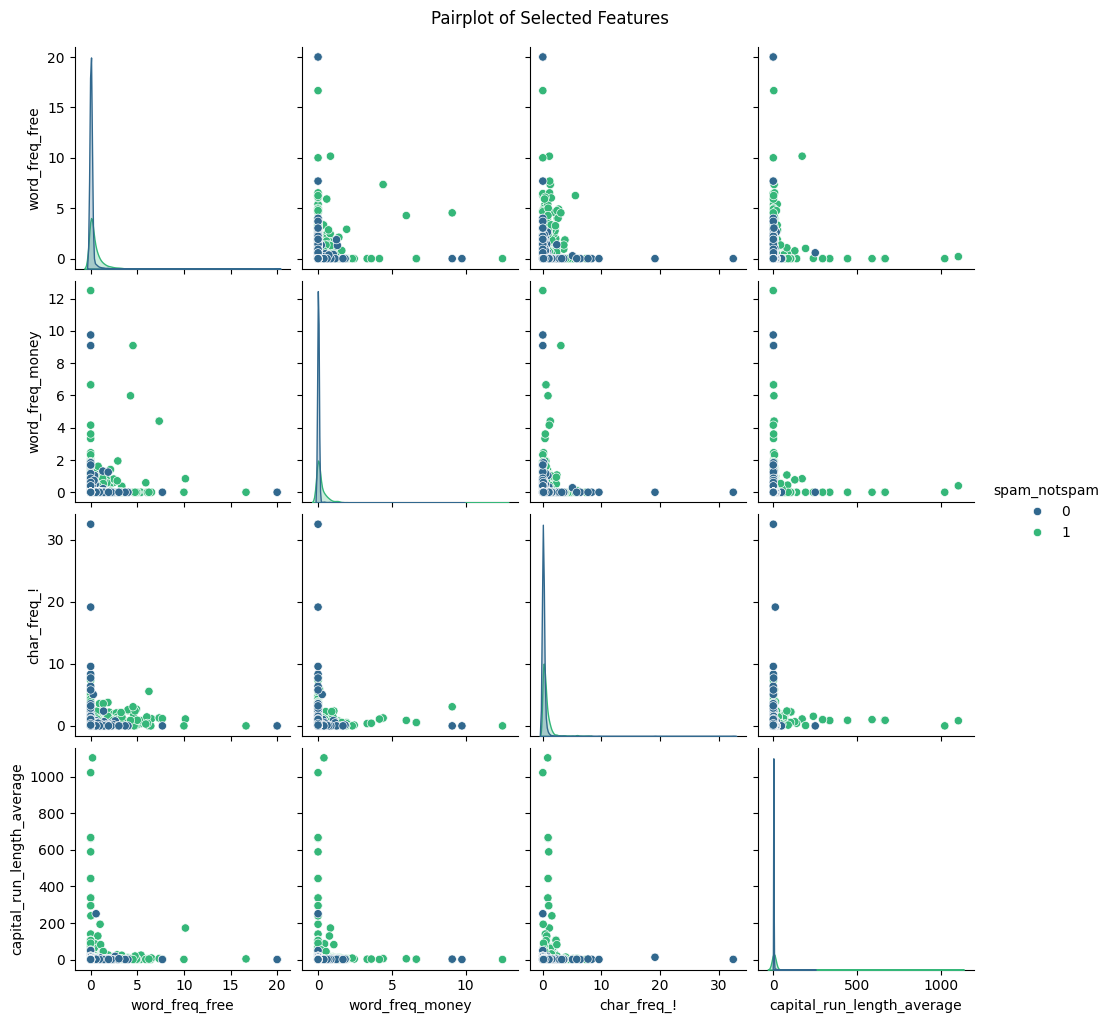

In [4]:
# Extract the last row of the correlation matrix
last_row = correlation_matrix.iloc[-1:, :]

# Plot the heatmap for the last row
plt.figure(figsize=(14, 2))
sns.heatmap(last_row, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of All Features with spam_notspam')
plt.show()


# Distribution of Key Features
key_features = ['word_freq_free', 'word_freq_money', 'char_freq_!', 'capital_run_length_average']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Boxplots of Key Features for Spam and Not Spam Emails
plt.figure(figsize=(14, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='spam_notspam', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Spam and Not Spam')

plt.tight_layout()
plt.show()

# Pairplot of Selected Features
selected_features = key_features + ['spam_notspam']
sns.pairplot(df[selected_features], hue='spam_notspam', palette='viridis')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

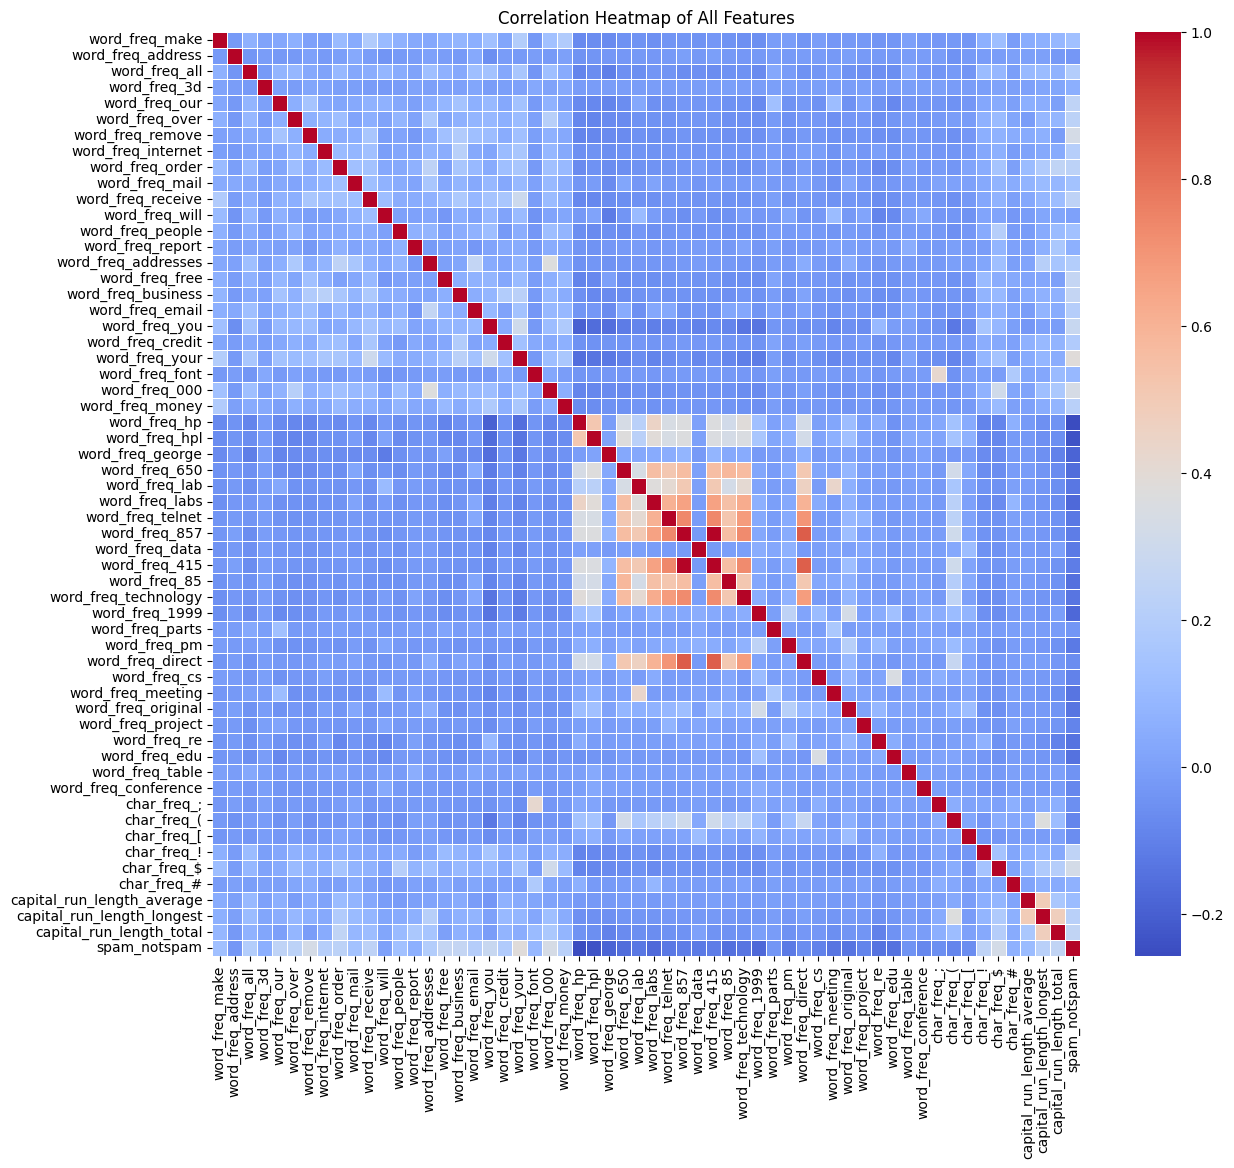

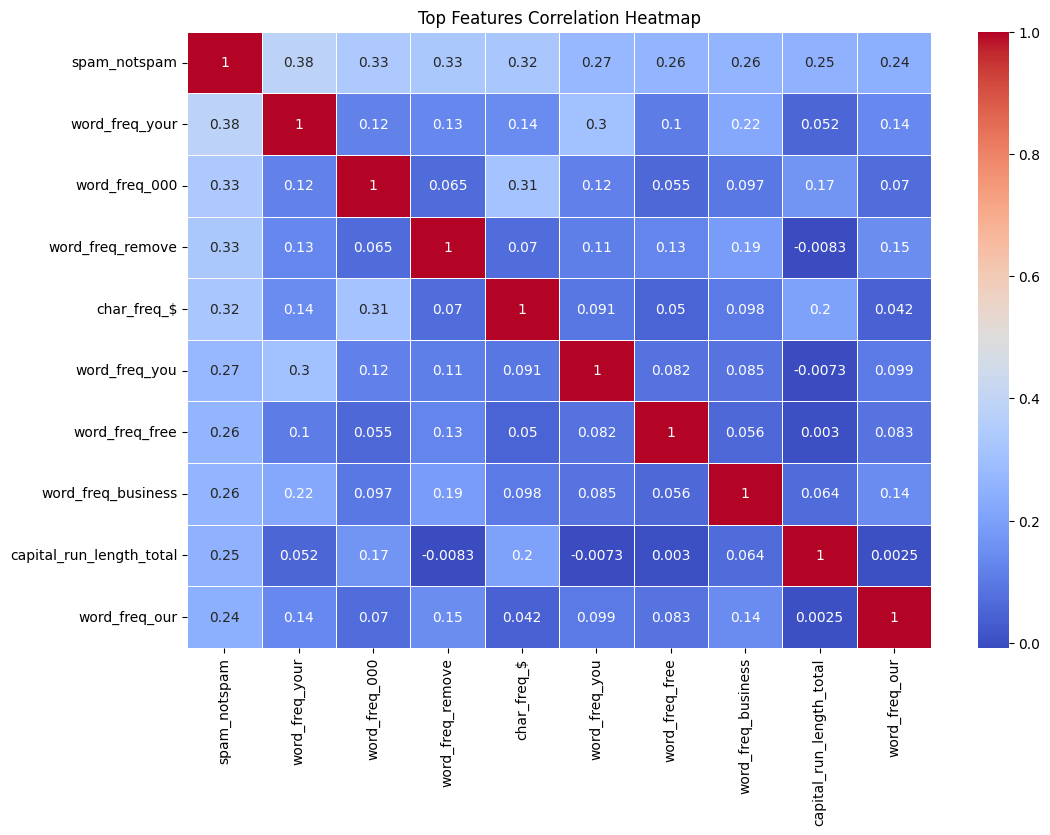

In [5]:
# Plotting the heatmap for the entire correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

# Heatmap focusing on the top correlations with the target
top_corr_features = correlation_with_target.index[:10].tolist()
plt.figure(figsize=(12, 8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Top Features Correlation Heatmap')
plt.show()

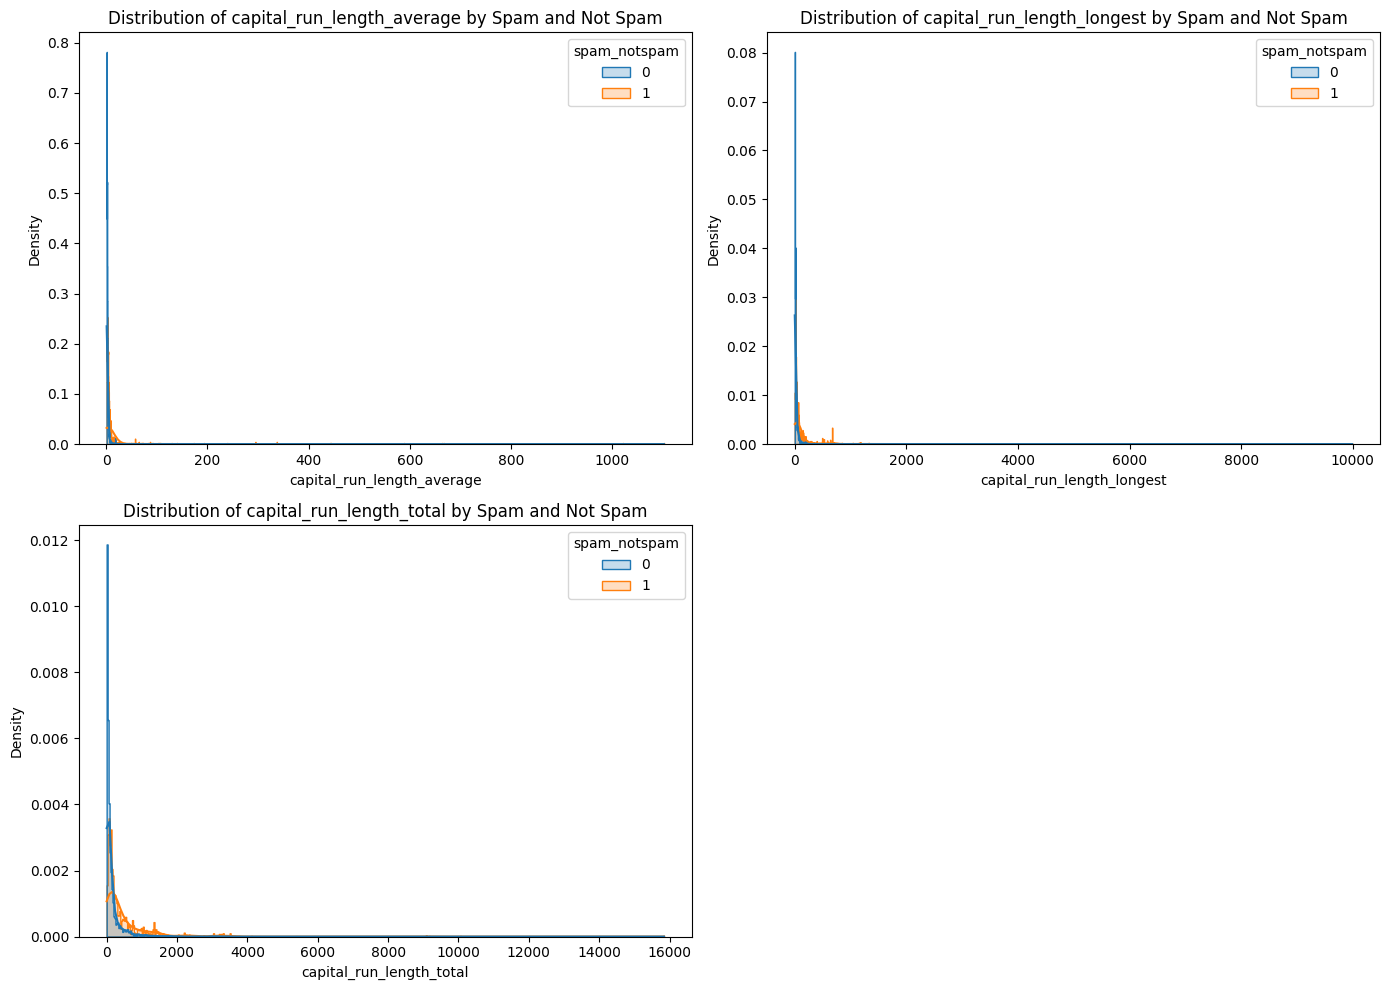

In [6]:
capital_features = ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(capital_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=feature, hue='spam_notspam', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by Spam and Not Spam')

plt.tight_layout()
plt.show()

In [7]:
# Separate features and target variable
X = df.drop('spam_notspam', axis=1)
y = df['spam_notspam']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)

                       feature  importance
51                 char_freq_!    0.117104
52                 char_freq_$    0.084407
6             word_freq_remove    0.073189
15              word_freq_free    0.068877
54  capital_run_length_average    0.063340
56    capital_run_length_total    0.055629
55  capital_run_length_longest    0.053145
20              word_freq_your    0.048315
24                word_freq_hp    0.045445
18               word_freq_you    0.038681
23             word_freq_money    0.032821
4                word_freq_our    0.030397
22               word_freq_000    0.027296
26            word_freq_george    0.024892
25               word_freq_hpl    0.019003
45               word_freq_edu    0.017956
7           word_freq_internet    0.013902
49                 char_freq_(    0.013667
36              word_freq_1999    0.013276
16          word_freq_business    0.011201
2                word_freq_all    0.010757
11              word_freq_will    0.010624
44         

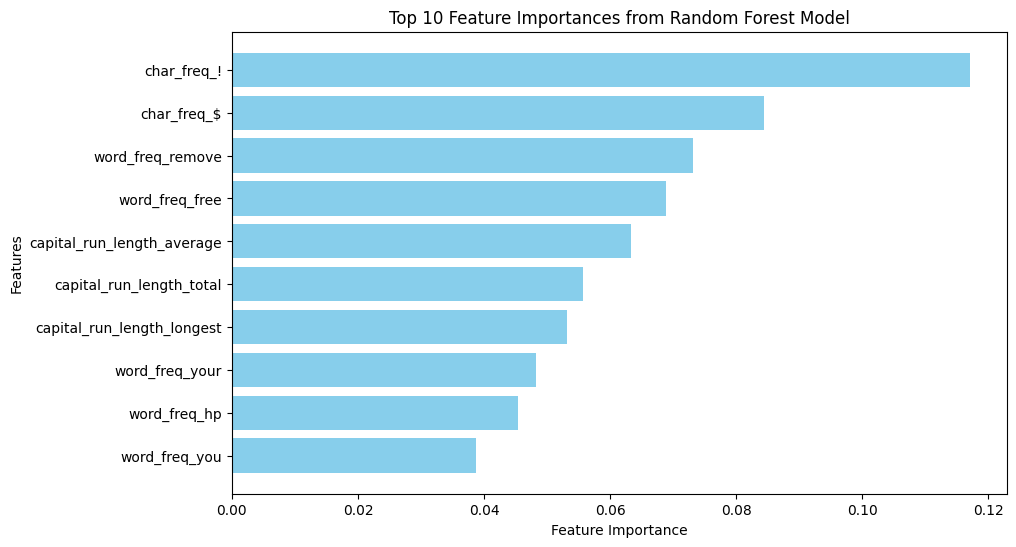

In [8]:
# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df)

# Select the top 5 features
top_10_features_df = feature_importance_df.head(10)

# Plot top 5 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_features_df['feature'], top_10_features_df['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


Top 5 features:
Feature: char_freq_!, Importance: 0.11710354086176941
Feature: char_freq_$, Importance: 0.08440675034915562
Feature: word_freq_remove, Importance: 0.07318934133864262
Feature: word_freq_free, Importance: 0.06887667694536974
Feature: capital_run_length_average, Importance: 0.06334013628730985
Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=100;

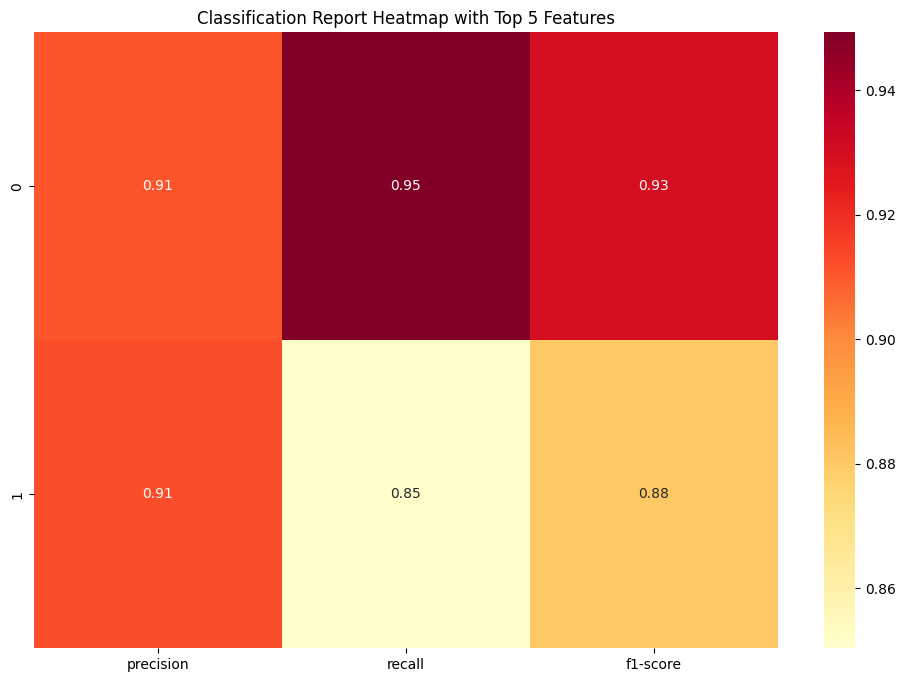


Top 7 features:
Feature: char_freq_!, Importance: 0.11710354086176941
Feature: char_freq_$, Importance: 0.08440675034915562
Feature: word_freq_remove, Importance: 0.07318934133864262
Feature: word_freq_free, Importance: 0.06887667694536974
Feature: capital_run_length_average, Importance: 0.06334013628730985
Feature: capital_run_length_total, Importance: 0.055629405889647154
Feature: capital_run_length_longest, Importance: 0.05314468476753423
Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] 

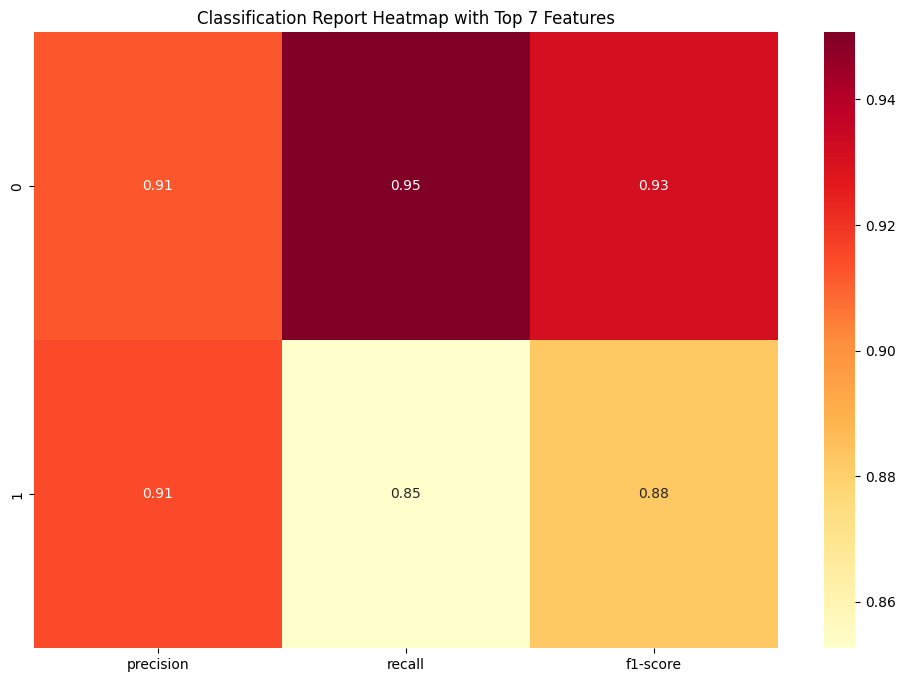


Top 10 features:
Feature: char_freq_!, Importance: 0.11710354086176941
Feature: char_freq_$, Importance: 0.08440675034915562
Feature: word_freq_remove, Importance: 0.07318934133864262
Feature: word_freq_free, Importance: 0.06887667694536974
Feature: capital_run_length_average, Importance: 0.06334013628730985
Feature: capital_run_length_total, Importance: 0.055629405889647154
Feature: capital_run_length_longest, Importance: 0.05314468476753423
Feature: word_freq_your, Importance: 0.04831538796498922
Feature: word_freq_hp, Importance: 0.04544542173625779
Feature: word_freq_you, Importance: 0.038680538108292375
Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.

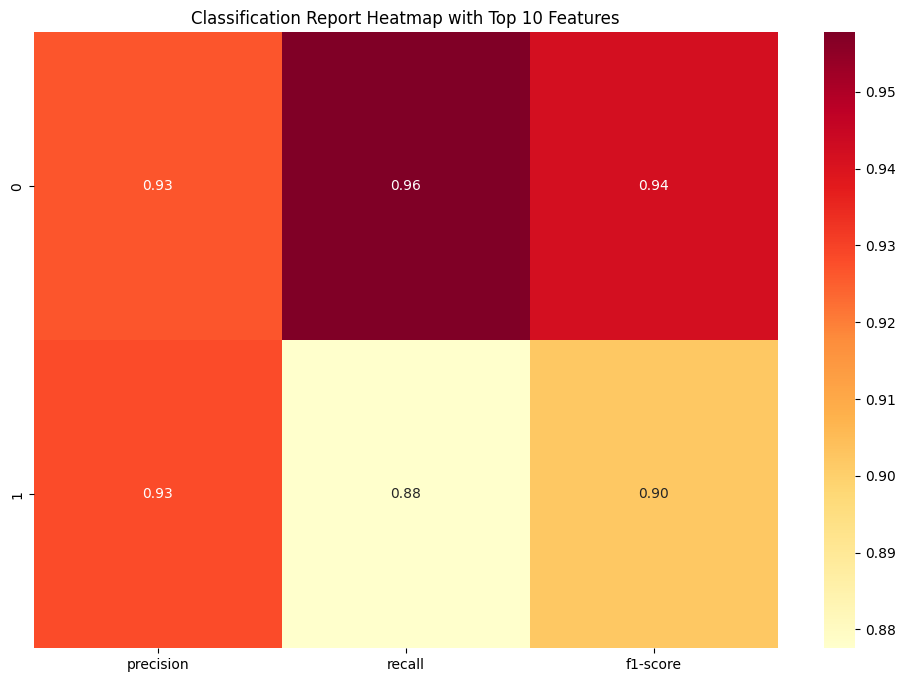

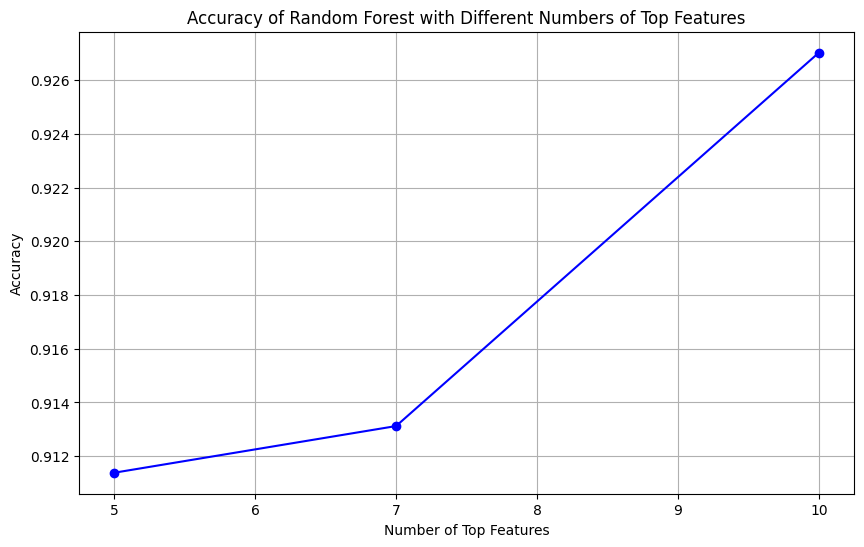

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

n = [5,7,10]

accuracies = []
class_reports = []

for i in n:
    L = -i
    
    # Get indices of top i features
    top_features_indices = np.argsort(feature_importances)[L:][::-1]

    # Get names of top features
    top_feature_names = [X.columns[j] for j in top_features_indices]

    # Print top feature names and their importance scores
    print(f"\nTop {i} features:")
    for j in top_features_indices:
        print(f"Feature: {X.columns[j]}, Importance: {feature_importances[j]}")

    # Select the top i features
    selected_features = top_feature_names

    # Create a new DataFrame with only the selected features
    df_selected = df[selected_features + ['spam_notspam']]

    # Separate the new features and target variable
    X_selected = df_selected.drop('spam_notspam', axis=1)
    y_selected = df_selected['spam_notspam']

    # Split the new data into training and testing sets
    X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.25, random_state=4)

    # Adjust Random Forest parameters
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5,6,7,8,9,10],
        'min_samples_leaf': [1,2,3]
    }

    # Use grid search cross-validation to find the best parameters
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train_selected, y_train_selected)

    # Print the best parameters found by grid search
    print("Best parameters found by grid search:", grid_search.best_params_)

    # Train the final model using the best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train_selected, y_train_selected)

    # Make predictions
    predictions = best_model.predict(X_test_selected)

    # Evaluate the model
    accuracy = accuracy_score(y_test_selected, predictions)
    accuracies.append(accuracy)
    print(f"Accuracy with top {i} features:", accuracy)

    # Generate classification report
    report = classification_report(y_test_selected, predictions, output_dict=True)

    # Create DataFrame excluding average metrics
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

    class_reports.append(report_df)

    # Plot the classification report as heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='YlOrRd', fmt='.2f')
    plt.title(f'Classification Report Heatmap with Top {i} Features')
    plt.show()

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(n, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy of Random Forest with Different Numbers of Top Features')
plt.xlabel('Number of Top Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, we

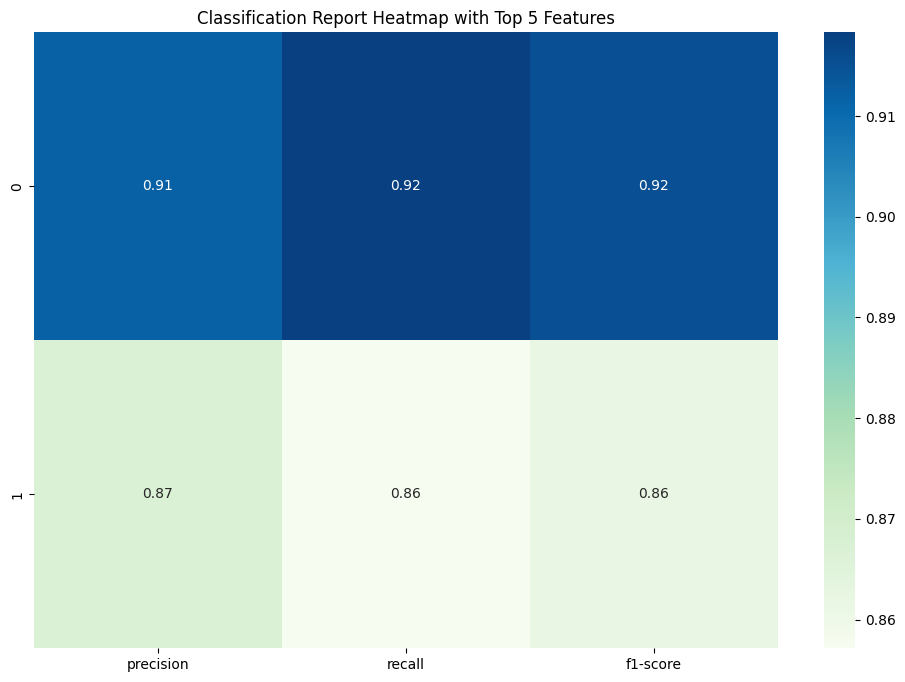

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, we

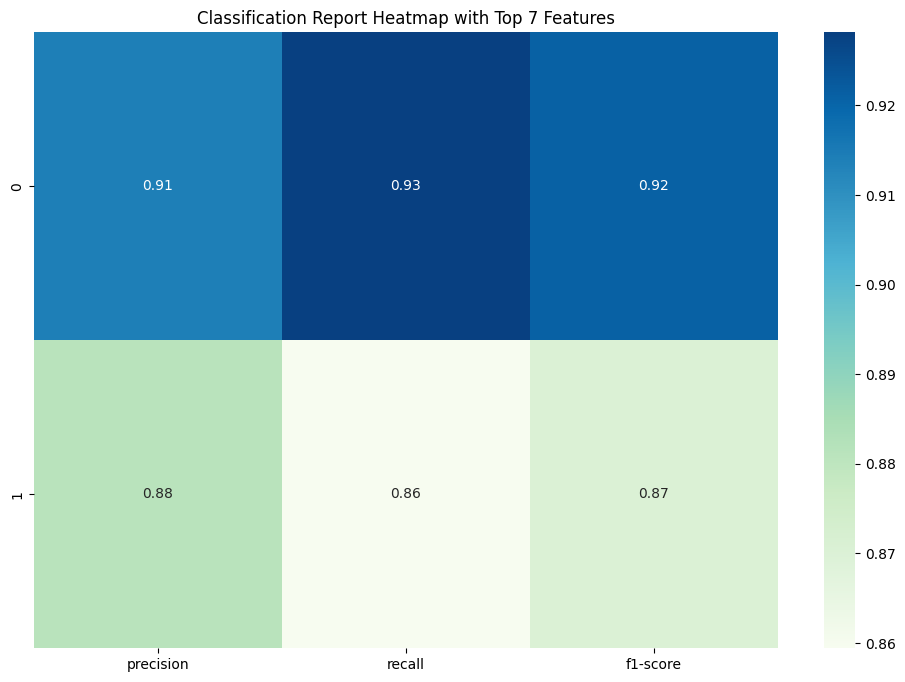

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, we

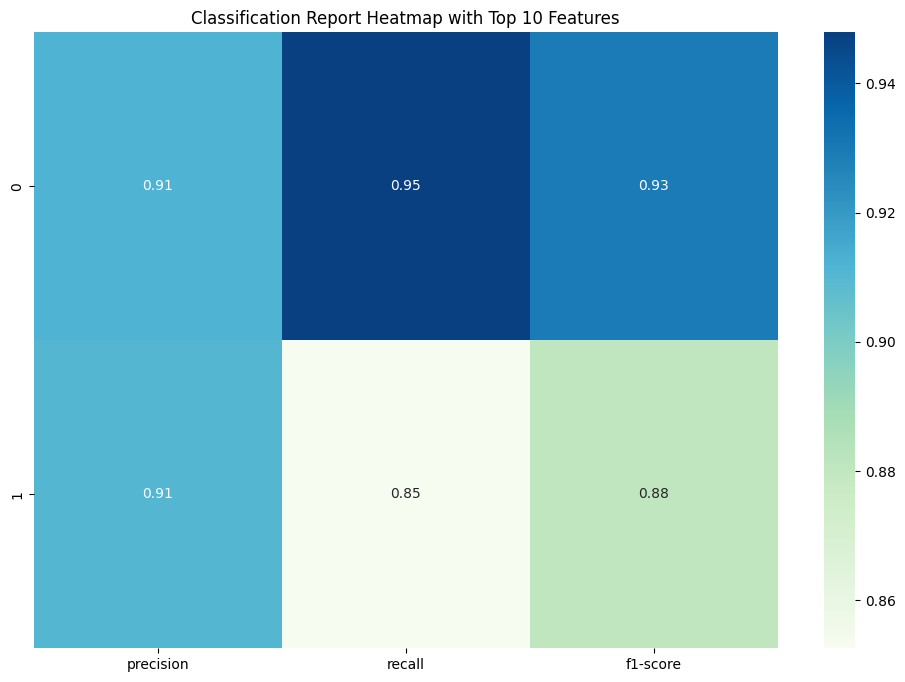

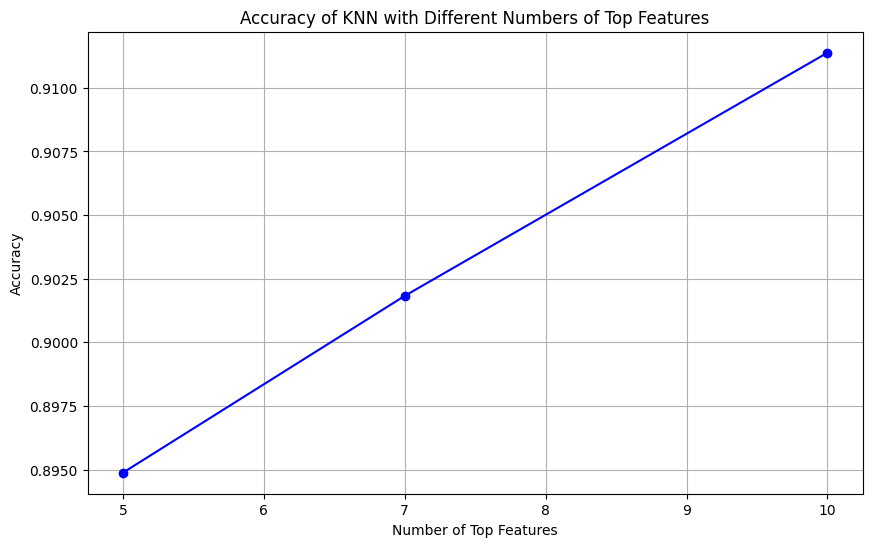

In [10]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# List to store accuracies
accuracies = []
class_reports = []

for i in n:
    L = -i
    
    # Get indices of top i features
    top_features_indices = np.argsort(feature_importances)[L:][::-1]

    # Get names of top features
    top_feature_names = [X.columns[j] for j in top_features_indices]

    # Select the top i features
    selected_features = top_feature_names

    # Create a new DataFrame with only the selected features
    df_selected = df[selected_features + ['spam_notspam']]

    # Separate the new features and target variable
    X_selected = df_selected.drop('spam_notspam', axis=1)
    y_selected = df_selected['spam_notspam']

    # Split the new data into training and testing sets
    X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.25, random_state=4)

    # Standardize the features
    scaler = StandardScaler()
    X_train_selected_scaled = scaler.fit_transform(X_train_selected)
    X_test_selected_scaled = scaler.transform(X_test_selected)

    # Train a KNN classifier
    knn = KNeighborsClassifier()

    # Perform grid search to find the best parameters
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
    grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train_selected_scaled, y_train_selected)

    # Train the final model using the best parameters
    best_knn_model = grid_search.best_estimator_
    best_knn_model.fit(X_train_selected_scaled, y_train_selected)

    # Make predictions
    knn_predictions = best_knn_model.predict(X_test_selected_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test_selected, knn_predictions)
    accuracies.append(accuracy)
    print(f"Accuracy with top {i} features:", accuracy)

    # Generate classification report
    report = classification_report(y_test_selected, knn_predictions, output_dict=True)

    # Create DataFrame excluding average metrics
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

    class_reports.append(report_df)

    # Plot the classification report as heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='GnBu', fmt='.2f')
    plt.title(f'Classification Report Heatmap with Top {i} Features')
    plt.show()
    
# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(n, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy of KNN with Different Numbers of Top Features')
plt.xlabel('Number of Top Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()